# Imports

In [1]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#data science - standard library
import pandas as pd
import numpy as np

#regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Read in data

In [2]:
filepath = "outputcities.csv"
df = pd.read_csv(filepath)

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Busselton,-33.65,115.33,59.00,51.91,80,996,14.16,95
1,Rikitea,-23.12,-134.97,73.13,68.92,76,1016,16.93,87
2,Clyde River,70.47,-68.59,-0.40,-17.95,70,1016,19.46,20
3,Hilo,19.73,-155.09,79.09,78.55,62,1017,10.29,75
4,Atuona,-9.80,-139.03,77.27,76.98,72,1011,11.92,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         562 non-null    object 
 1   Latitude     562 non-null    float64
 2   Longitude    562 non-null    float64
 3   Temperature  562 non-null    float64
 4   Feels Like   562 non-null    float64
 5   Humidity     562 non-null    int64  
 6   Pressure     562 non-null    int64  
 7   Wind Speed   562 non-null    float64
 8   Cloudiness   562 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 39.6+ KB


In [4]:
df.describe()

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,20.177064,17.026512,57.722295,54.032989,72.428826,1013.845196,8.547509,49.389680
std,32.720077,88.840355,22.827565,27.606830,20.030710,10.269413,6.477924,39.049072
min,-54.800000,-179.170000,-20.060000,-27.360000,10.000000,952.000000,0.310000,0.000000
25%,-4.190000,-59.167500,42.800000,33.700000,61.000000,1010.000000,3.375000,3.000000
50%,24.745000,20.580000,63.715000,59.445000,76.000000,1014.000000,6.930000,47.000000
75%,46.587500,92.862500,76.570000,77.722500,88.000000,1021.000000,11.797500,90.000000
max,78.220000,179.320000,92.520000,98.710000,100.000000,1032.000000,44.830000,100.000000


# Scatterplots

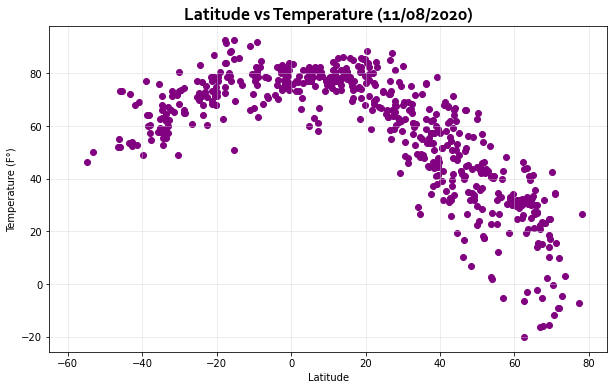

In [5]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "#800080")
plt.title("Latitude vs Temperature (11/08/2020)", fontsize=18, fontweight="bold", fontname = "Corbel")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-65, 85)

plt.show()

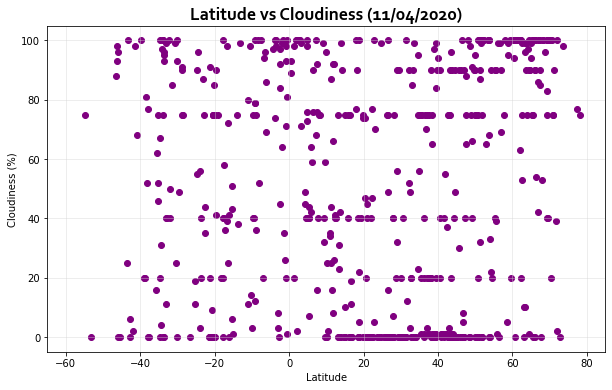

In [6]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "#800080")
plt.title("Latitude vs Cloudiness (11/04/2020)", fontsize=18, fontweight="bold", fontname = "Corbel")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-65, 85)

plt.show()

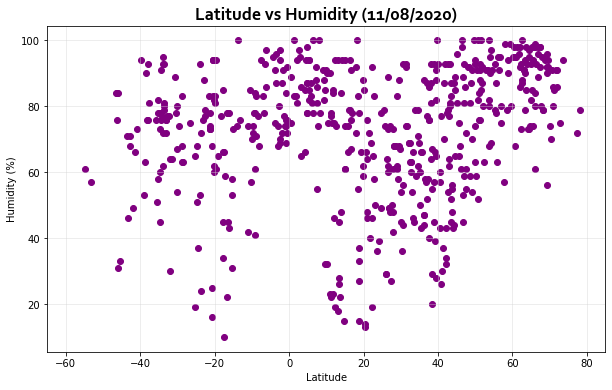

In [7]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "#800080")
plt.title("Latitude vs Humidity (11/08/2020)", fontsize=18, fontweight="bold", fontname = "Corbel")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-65, 85)

plt.show()

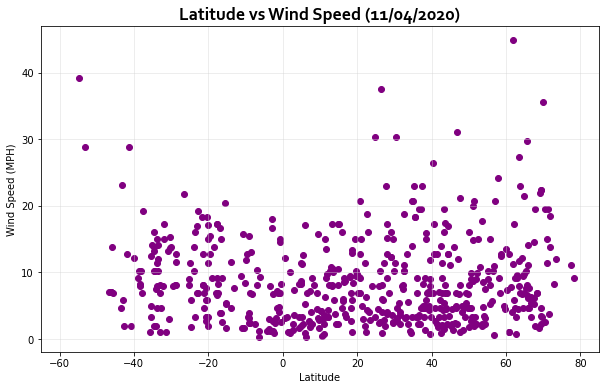

In [8]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "#800080")
plt.title("Latitude vs Wind Speed (11/04/2020)", fontsize=18, fontweight="bold", fontname = "Corbel")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-65, 85)

plt.show()

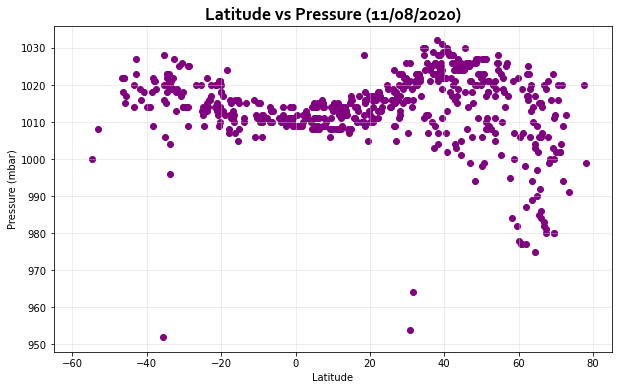

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Pressure, color = "#800080")
plt.title("Latitude vs Pressure (11/08/2020)", fontsize=18, fontweight="bold", fontname = "Corbel")
plt.xlabel("Latitude")
plt.ylabel("Pressure (mbar)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-65, 85)

plt.show()

# Correlations

In [10]:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,-0.096457,-0.672527,-0.664996,0.181317,-0.133044,0.002229,0.057412
Longitude,-0.096457,1.000000,-0.141426,-0.093065,0.227197,0.017585,-0.229207,0.062024
Temperature,-0.672527,-0.141426,1.000000,0.983022,-0.335460,0.076295,-0.025081,-0.110685
Feels Like,-0.664996,-0.093065,0.983022,1.000000,-0.226473,0.085926,-0.166105,-0.085481
Humidity,0.181317,0.227197,-0.335460,-0.226473,1.000000,-0.169816,-0.086320,0.377882
Pressure,-0.133044,0.017585,0.076295,0.085926,-0.169816,1.000000,-0.205183,-0.291078
Wind Speed,0.002229,-0.229207,-0.025081,-0.166105,-0.086320,-0.205183,1.000000,0.082459
Cloudiness,0.057412,0.062024,-0.110685,-0.085481,0.377882,-0.291078,0.082459,1.000000


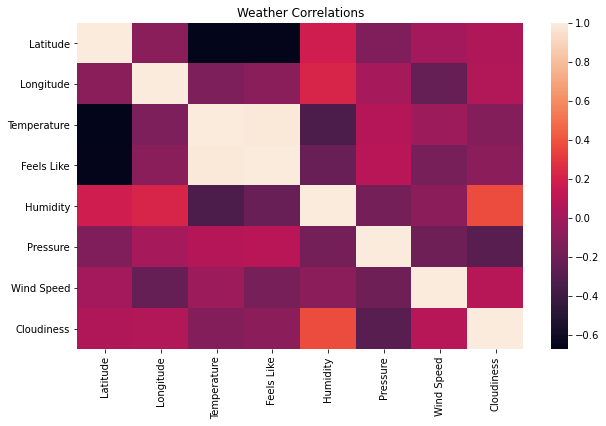

In [11]:
#Heatmap
plt.figure(figsize=(10,6))

sns.heatmap(corrs)

plt.title("Weather Correlations")
plt.show()

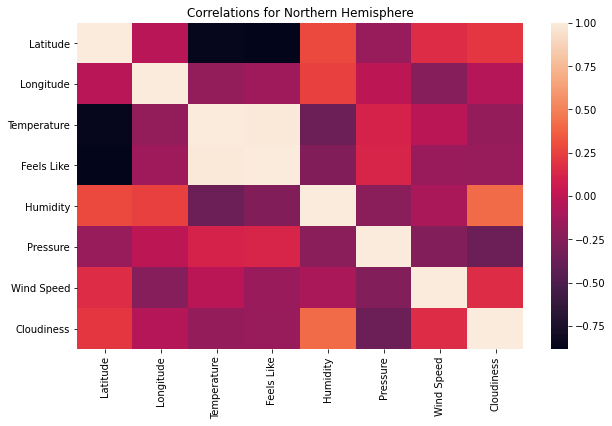

In [12]:
#Heatmap Northern Hemisphere
corrsNorthern = df.loc[df.Latitude >= 0].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrsNorthern)

plt.title("Correlations for Northern Hemisphere")
plt.show()

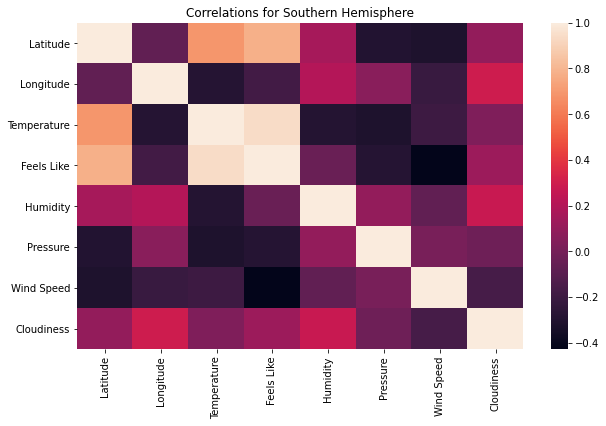

In [13]:
#Heatmap Southern Hemisphere
corrsSouthern = df.loc[df.Latitude < 0].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrsSouthern)

plt.title("Correlations for Southern Hemisphere")
plt.show()

# Linear Regressions

In [14]:
#Hemispheres
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]


In [15]:
def doRegressionWork(hemisphere, df, inp_target):
    #filter
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere == hemisphere]
        
    # get target
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # get slope
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # plot
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "darkgreen")
    plt.title(f"Latitude vs {inp_target} (11/08/2020)", fontsize=18, fontweight="bold", fontname = "Corbel")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="orange")

    plt.show()

## Northern Hemisphere Regression of Latitude and Temperature

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1114.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          3.66e-117
Time:                        19:07:55   Log-Likelihood:                -1566.4
No. Observations:                 398   AIC:                             3137.
Df Residuals:                     396   BIC:                             3145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.1979      1.325     68.830      0.0

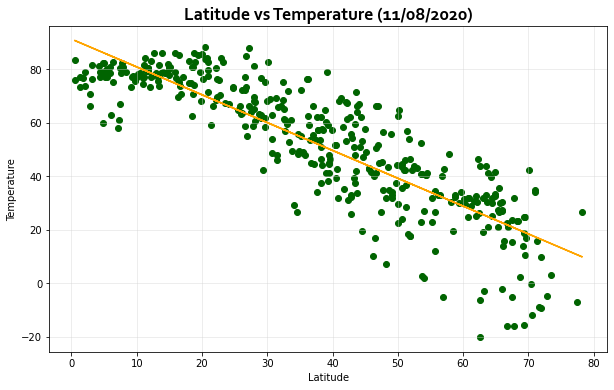

In [16]:
doRegressionWork("Northern", df, "Temperature")

## Southern Hemisphere Regression of Latitude and Temperature


                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.18e-24
Time:                        19:07:55   Log-Likelihood:                -561.22
No. Observations:                 164   AIC:                             1126.
Df Residuals:                     162   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.7851      1.119     73.953      0.0

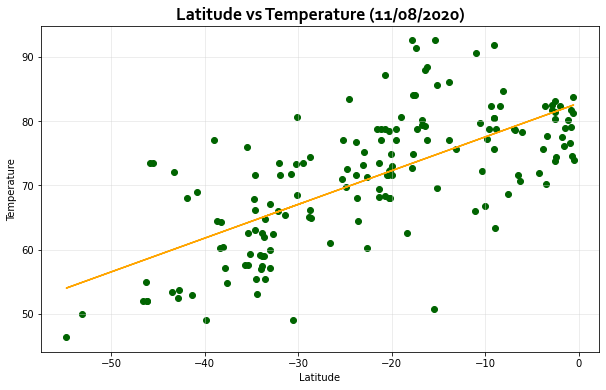

In [17]:
doRegressionWork("Southern", df, "Temperature")

## Northern Hemisphere Regression of Latitude and Wind Speed

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     11.11
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           0.000942
Time:                        19:07:55   Log-Likelihood:                -1309.6
No. Observations:                 398   AIC:                             2623.
Df Residuals:                     396   BIC:                             2631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3267      0.695      9.102      0.0

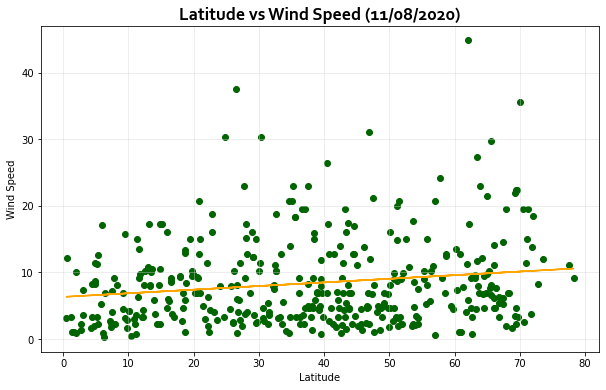

In [18]:
doRegressionWork("Northern", df, "Wind Speed")

## Southern Hemisphere Regression of Latitude and Wind Speed


                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     17.42
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           4.87e-05
Time:                        19:07:55   Log-Likelihood:                -522.43
No. Observations:                 164   AIC:                             1049.
Df Residuals:                     162   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8252      0.884      6.592      0.0

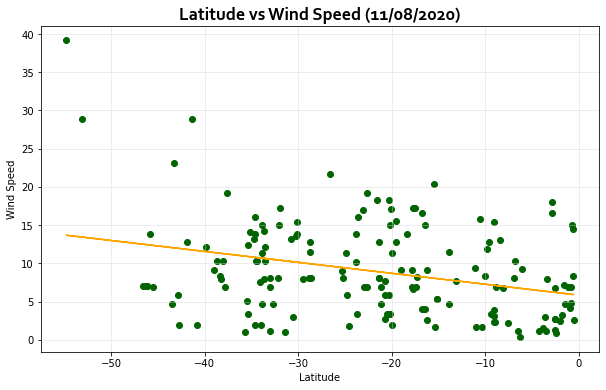

In [19]:
doRegressionWork("Southern", df, "Wind Speed")

## Northern Hemisphere Regression of Latitude and Humidity


                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     35.41
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           5.89e-09
Time:                        19:07:55   Log-Likelihood:                -1755.0
No. Observations:                 398   AIC:                             3514.
Df Residuals:                     396   BIC:                             3522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.8010      2.128     29.039      0.0

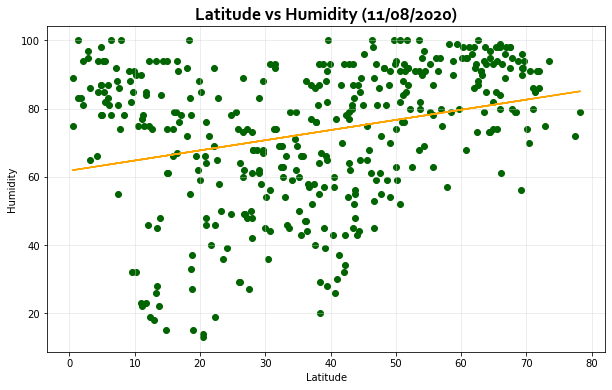

In [20]:
doRegressionWork("Northern", df, "Humidity")

## Southern Hemisphere Regression of Latitude and Humidity

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.167
Date:                Sun, 08 Nov 2020   Prob (F-statistic):             0.0428
Time:                        19:07:55   Log-Likelihood:                -704.41
No. Observations:                 164   AIC:                             1413.
Df Residuals:                     162   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.7642      2.680     28.267      0.0

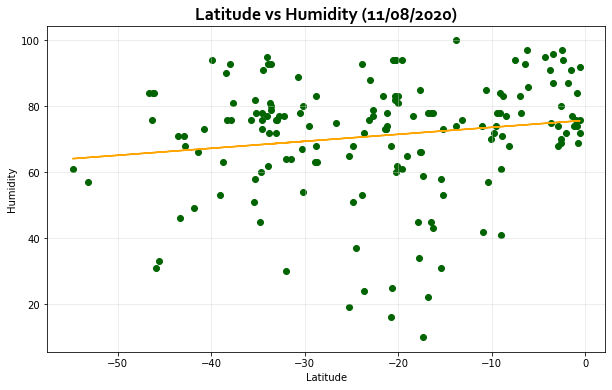

In [21]:
doRegressionWork("Southern", df, "Humidity")

## Northern Hemisphere Regression of Latitude and Cloudiness

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     18.24
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.44e-05
Time:                        19:07:56   Log-Likelihood:                -2020.5
No. Observations:                 398   AIC:                             4045.
Df Residuals:                     396   BIC:                             4053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.3656      4.146      7.806      0.0

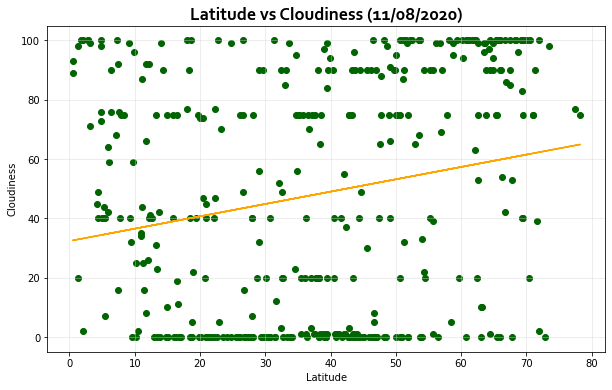

In [22]:
doRegressionWork("Northern", df, "Cloudiness")

## Southern Hemisphere Regression of Latitude and Cloudiness

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.546
Date:                Sun, 08 Nov 2020   Prob (F-statistic):              0.216
Time:                        19:07:56   Log-Likelihood:                -825.03
No. Observations:                 164   AIC:                             1654.
Df Residuals:                     162   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7060      5.592     10.497      0.0

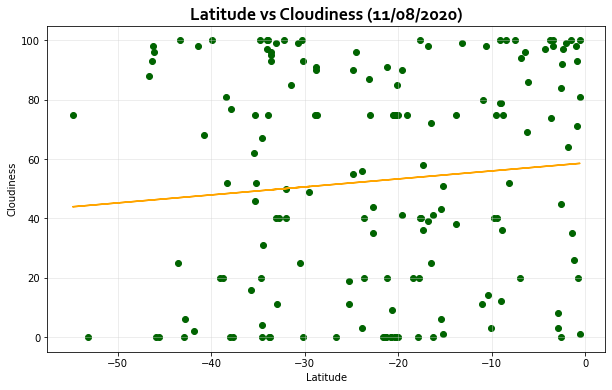

In [23]:
doRegressionWork("Southern", df, "Cloudiness")

## Northern Hemisphere Regression of Latitude and Pressure

                            OLS Regression Results                            
Dep. Variable:               Pressure   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     11.03
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           0.000978
Time:                        19:07:56   Log-Likelihood:                -1522.6
No. Observations:                 398   AIC:                             3049.
Df Residuals:                     396   BIC:                             3057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1017.0879      1.187    856.986      0.0

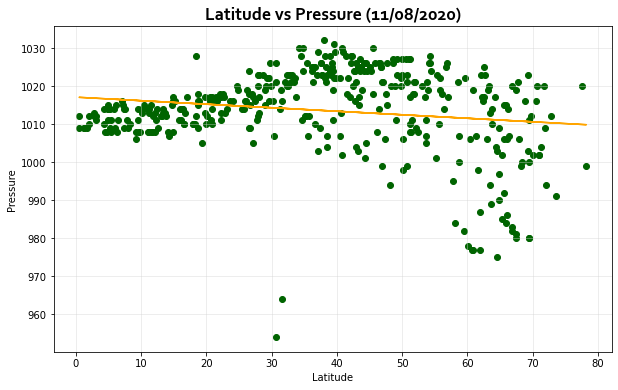

In [24]:
doRegressionWork("Northern", df, "Pressure")

## Southern Hemisphere Regression of Latitude and Pressure

                            OLS Regression Results                            
Dep. Variable:               Pressure   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     15.39
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           0.000129
Time:                        19:07:56   Log-Likelihood:                -551.00
No. Observations:                 164   AIC:                             1106.
Df Residuals:                     162   BIC:                             1112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1010.8967      1.052    961.115      0.0

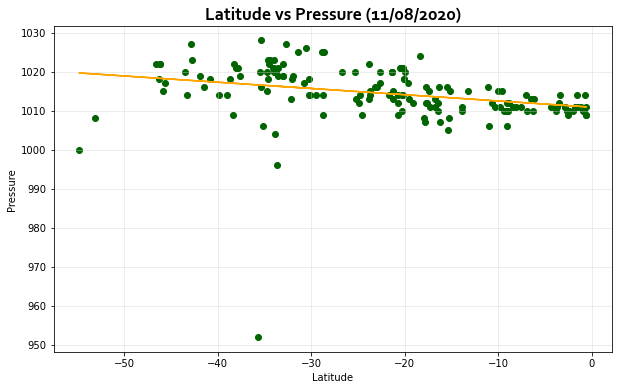

In [25]:
doRegressionWork("Southern", df, "Pressure")